In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from dicom_data_pipeline import data_loader
from dicom_data_segmentation.segmentation import FlexibleThresholdSegmentation


            Doing FlexibleThresholdSegmentation on patient #0
            ###########################################################################################


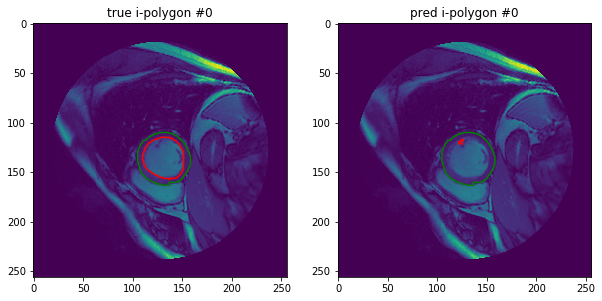

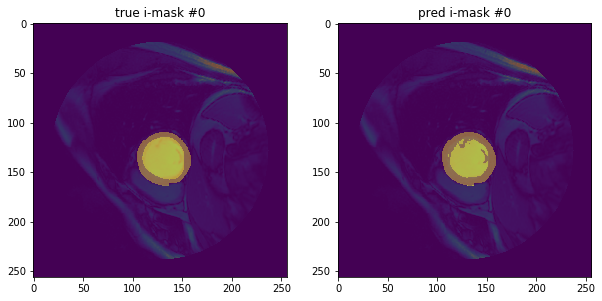

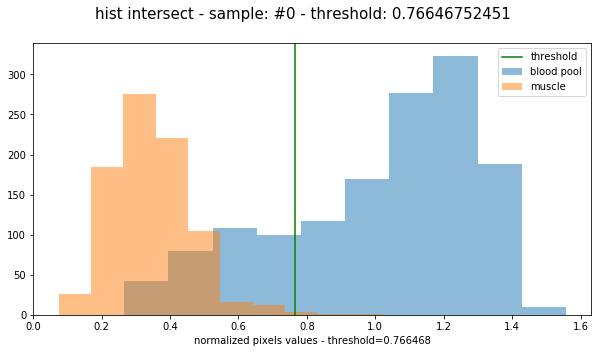


            Patient #0 data segmentation done in 1.32317590714 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #1
            ###########################################################################################


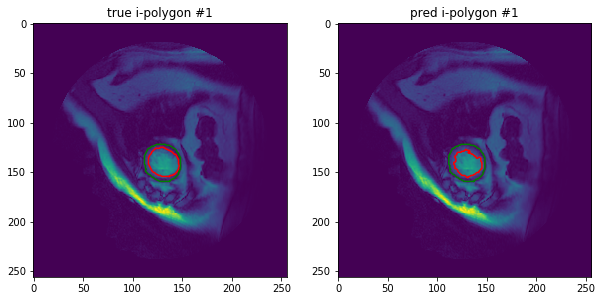

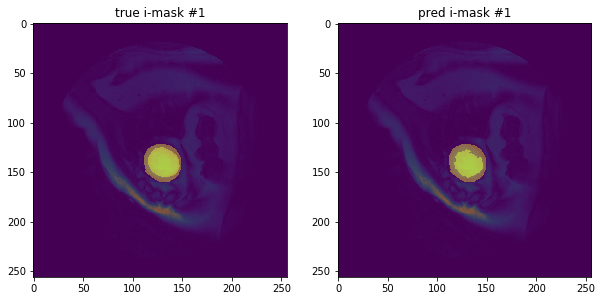

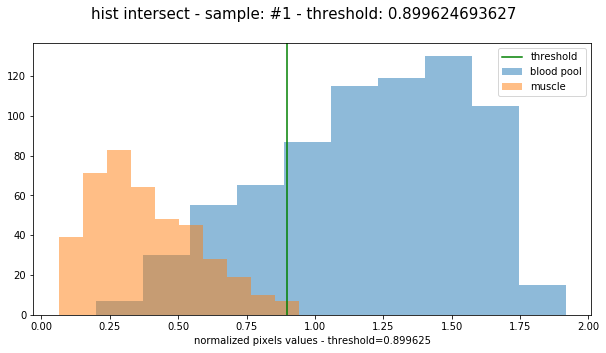


            Patient #1 data segmentation done in 1.35884404182 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #2
            ###########################################################################################


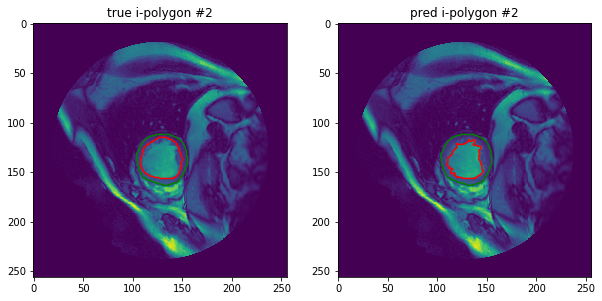

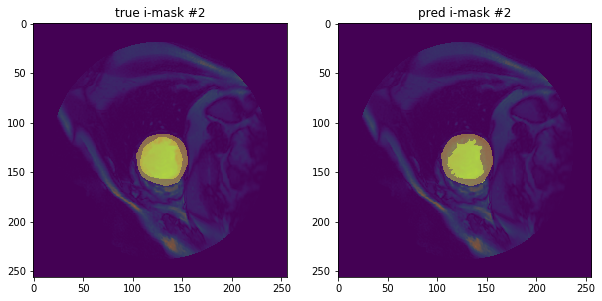

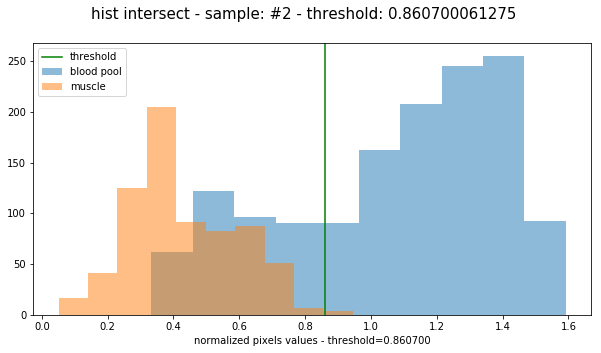


            Patient #2 data segmentation done in 1.1719789505 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #3
            ###########################################################################################


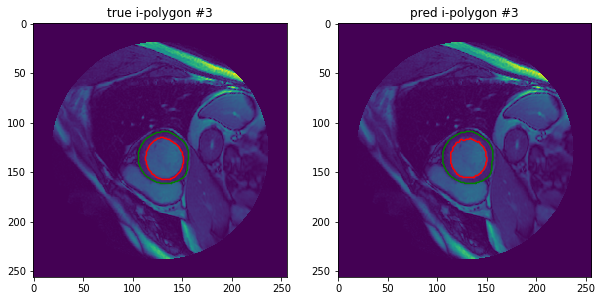

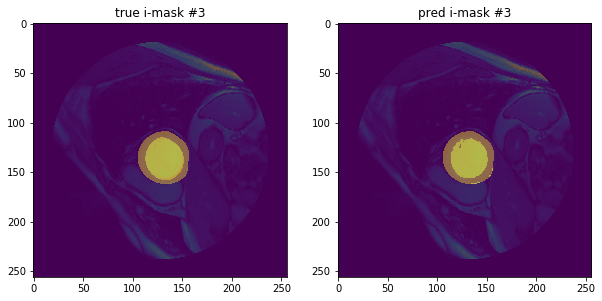

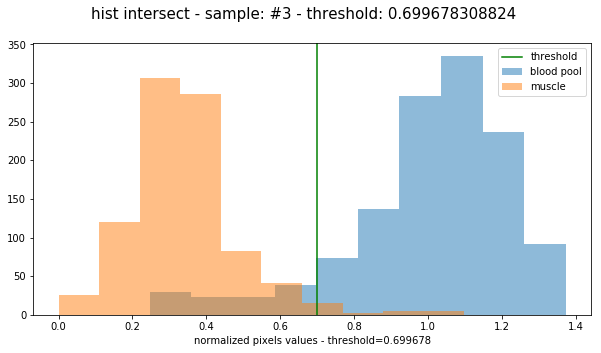


            Patient #3 data segmentation done in 1.12944102287 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #4
            ###########################################################################################


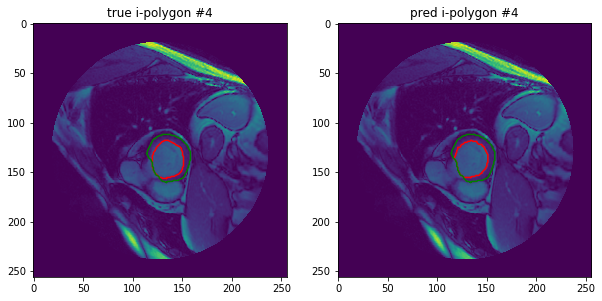

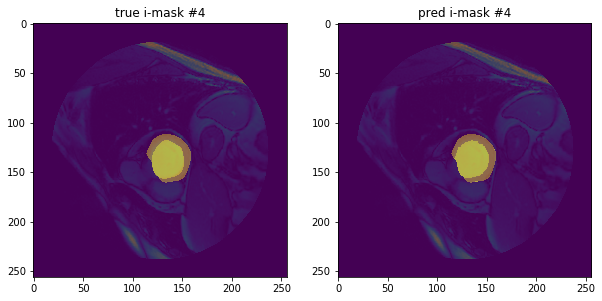

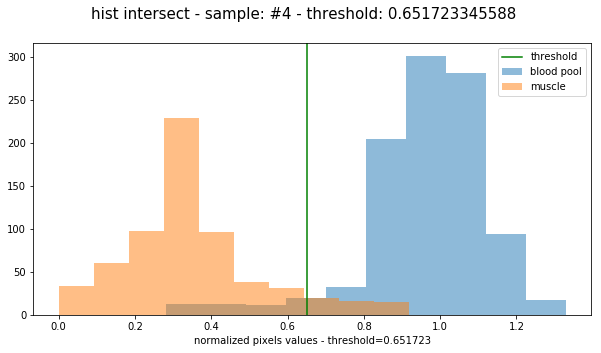


            Patient #4 data segmentation done in 1.21951293945 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #5
            ###########################################################################################


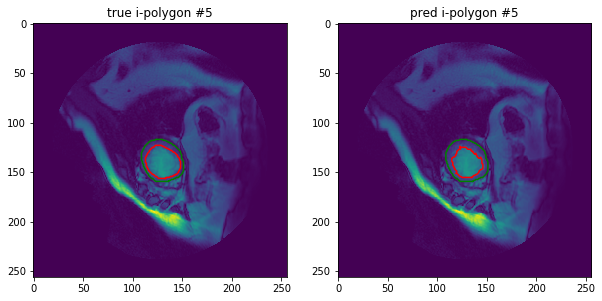

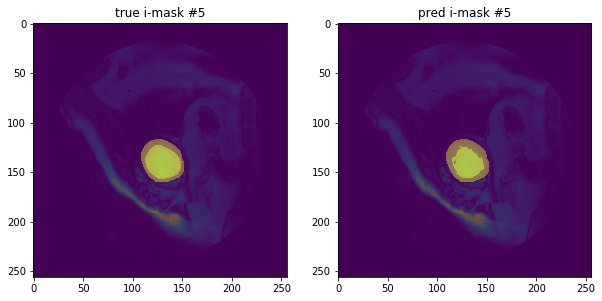

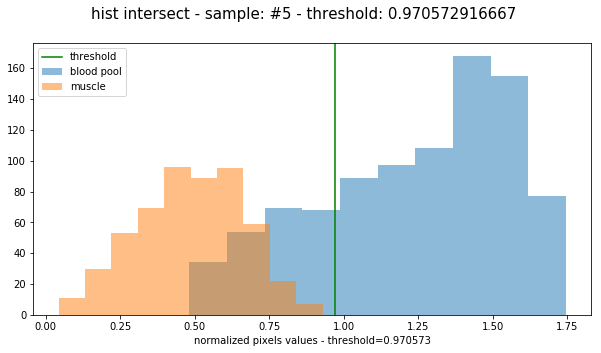


            Patient #5 data segmentation done in 1.29840612411 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #6
            ###########################################################################################


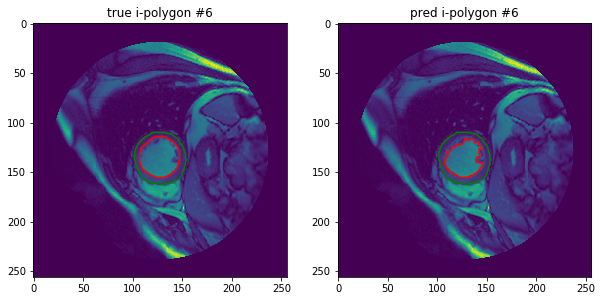

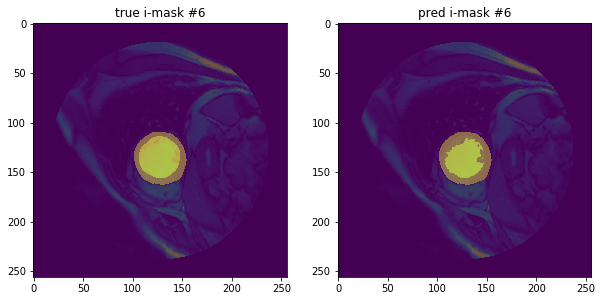

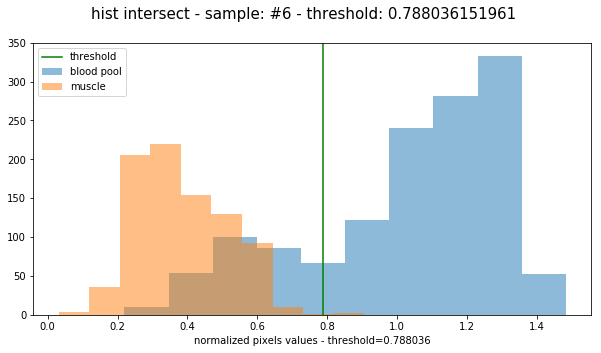


            Patient #6 data segmentation done in 1.27146911621 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #7
            ###########################################################################################


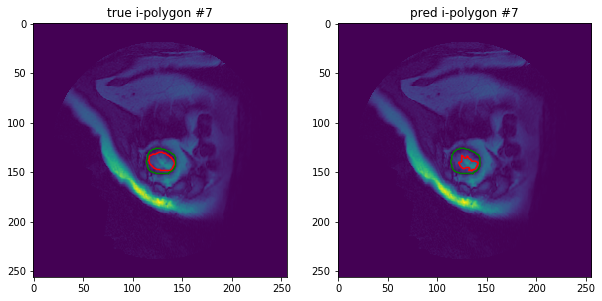

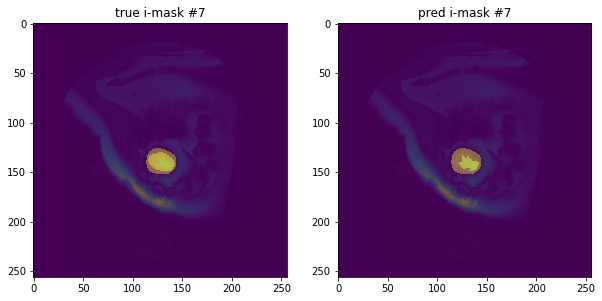

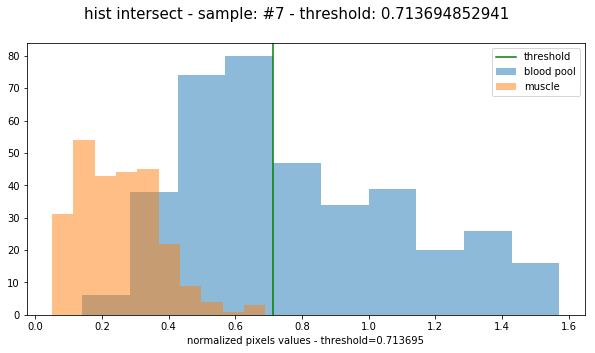


            Patient #7 data segmentation done in 1.29459881783 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #8
            ###########################################################################################


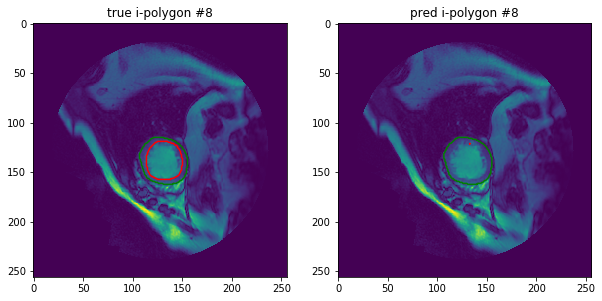

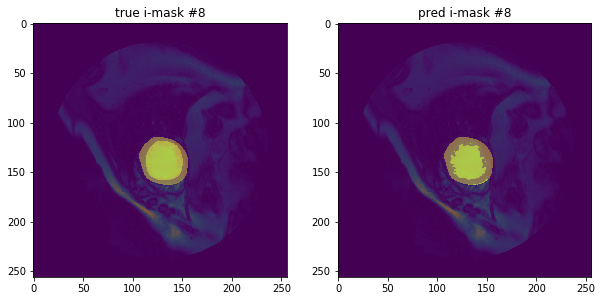

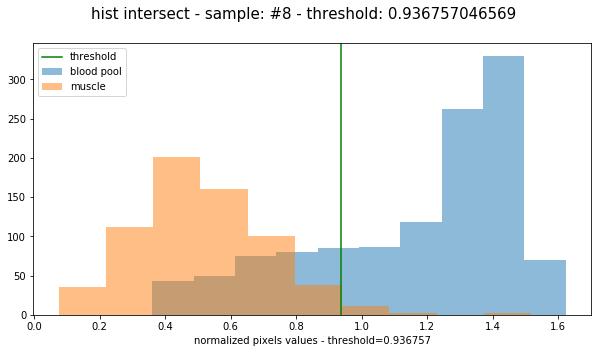


            Patient #8 data segmentation done in 1.21435284615 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #9
            ###########################################################################################


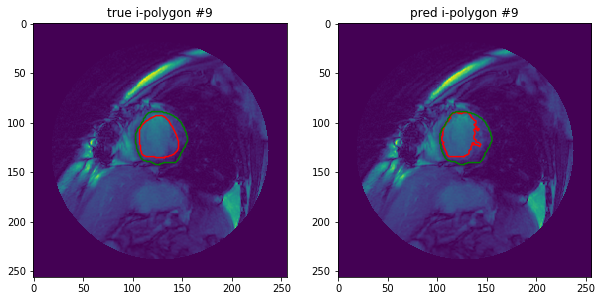

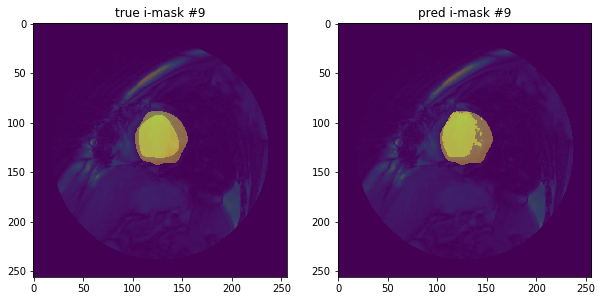

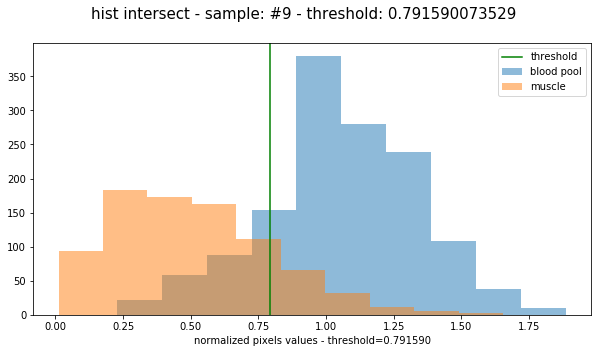


            Patient #9 data segmentation done in 1.16735386848 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #10
            ###########################################################################################


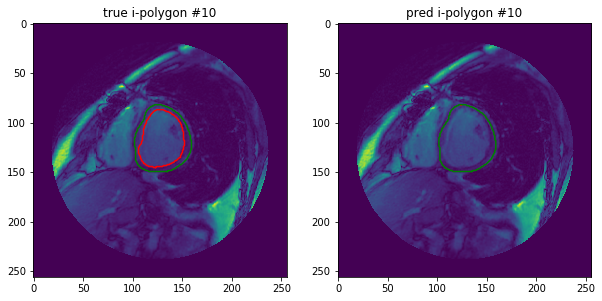

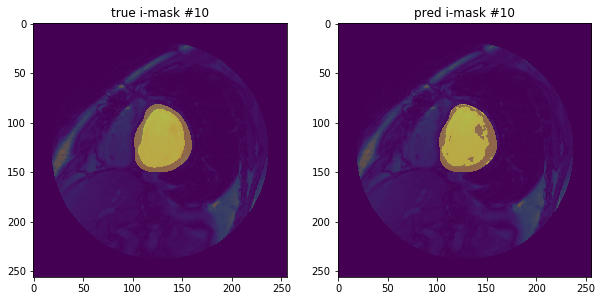

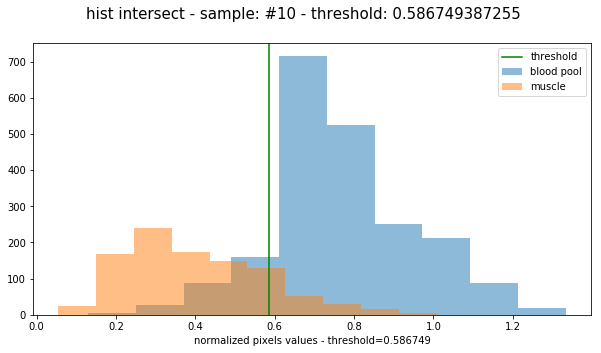


            Patient #10 data segmentation done in 1.2698059082 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #11
            ###########################################################################################

            Patient #11 data segmentation done in 0.56253695488 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #12
            ###########################################################################################

            Patient #12 data segmentation done in 0.735592126846 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on 


            Patient #31 data segmentation done in 0.758014917374 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #32
            ###########################################################################################

            Patient #32 data segmentation done in 0.523792982101 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation on patient #33
            ###########################################################################################

            Patient #33 data segmentation done in 0.504217863083 seconds.
            ###########################################################################################
            
            

            Doing FlexibleThresholdSegmentation 

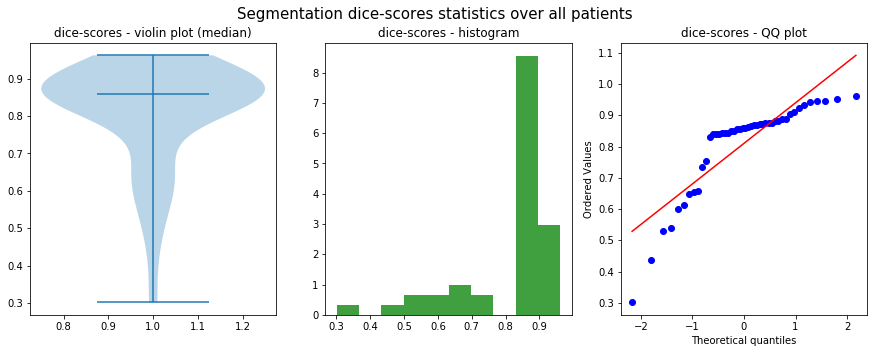

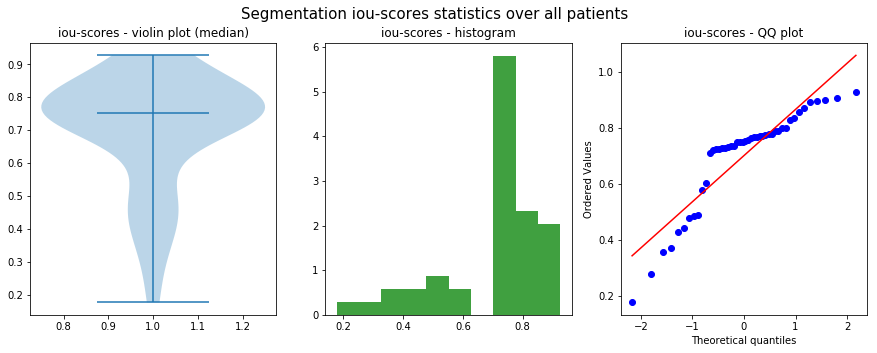

In [2]:
get_data_iterator = lambda : \
    data_loader.DicomMasksDataset(img_masks_filepath='_data/image-masks.i-contours.o-contours.csv')
    
FlexibleThresholdSegmentation(
    data_iterator = get_data_iterator(),
    segmentation_method = FlexibleThresholdSegmentation.__name__,
    plots_prefix = '_plots',
    results_prefix = '_results'
).fit(show_plots=True, max_plots=10)

# Results Analysis:

##  Intro:

- Our goal is to answer the two questions : could you use a (local) thresholding scheme to automatically create the i-contours, given the o-contours? Are the results improved over the fix thresholding scheme ?

- Similarly as in FixedThresholdSegmentation.ipynb, in the following sections we perform both qualitative and quantitative analysis to verify this assumption.


## Segmentation method :   FlexibleThresholdSegmentation

- Before jumping to the analysis, few words on this segmentation method:
- Here the threshold is chosen per image using the otsu segmentation method.
- The notebook ComparativeAnalysis.ipynb walks you through the comparison of the results obtained with this method to others I've tried.


## Qualitative analysis:

- We can see from the side-by-side plots: ground-thruth i-contour/mask with the predicted i-contour/mask That the segmentation is better(ie: smoother/well-formed) than with the fixedSegmentation scheme.(just plotted 10 above to keep the notebook slim, change the parameter max_plots for more)


## Quantitative analysis:

- We have computed the classic dice_coefficient and intersection_over_union metrics on each sample to quantify how good this approach is.
- Using those scores we perform some descriptive statistics on their distribution. And here are the results:
 
     Quantitative Statistics on Scores:
            dice_scores stats :
                DescribeResult(nobs=46, minmax=(0.30115830115830117, 0.9622153209109731), mean=0.8101015390587594, variance=0.020762008951183977, skewness=-1.7392767584440239, kurtosis=2.5892127782741348)
            dice_scores median :
                0.859211346484
                
                
            Intersection_over_Union_scores stats:
                DescribeResult(nobs=46, minmax=(0.17727272727272728, 0.9271820448877806), mean=0.7013406453741637, variance=0.03052638031311067, skewness=-1.2804724676659944, kurtosis=0.9234898322179155)
             Intersection_over_Union_scores median :
                0.753174844274
                
- skewness is very negative, and pretty high(in absolute-value) -> a distribution of scores close to 1.0.
- Also, The median for both scores(dice and IOU) is pretty high for the small effort invested (0.86, 0.75 respectively), denotting a small improvement over the fix threshold version.
- This numbers are also confirmed by the violin and histogram plots where we see a very skewed distribution of scores.

- What about the QQ-plots?

- Also here, QQ-plots enables us to confirm that the scores distributions aren't Gaussian (since points aren't aligned on the first-diagonal), which will have an impact on which kind of statistics-test to use when comparing different approaches. More in the notebook: ComparativeAnalysis.ipynb




## Conclusion:

- With these analysis, numbers and plots we can convince a non-expert that FlexibleThresholdSegmentation does a pretty good job at segmenting blood pool and muscles.

- However we didn't got a CLEAR and IRREFUTABLE answer to the other question which was: is it better than FixedThresholdSegmentation since the scores median only went up from 0.84 to 0.86 for dice-score and from 0.73 to 0.75 for iou-score.

- Since this could be due to 'chance', we need a more robust way to assess the differences between the two methods. More in the notebook: ComparativeAnalysis.ipynb


- Given the initial problem formulation: Given the o-contour find the i-contour, someone a bit familiar with the image segmentation litterature will directly think about ActiveContours since that's precisely how they proceed: moving from a big area and reducing it until a point of convergence.  


- Consequently the answer to the question: Do you think that any other heuristic (non-machine learning)-based approaches, besides simple thresholding, would work in this case? Explain.   Is a BIG YES: ActiveContours.  Let's find out how they perform in the notebook ActiveContourSegmentation.ipynb